In [270]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
from datetime import datetime

In [271]:
TOKEN_AP = "KLEA72KJBOIII7AA"
TOKEN_FH = "bqoji3nrh5rced4gaukg"

In [272]:
def getDaily(symbol , size):
    function = 'TIME_SERIES_DAILY'
    url = 'https://www.alphavantage.co/query'
    parametros = {'function':function , 'symbol':symbol , 'outputsize':size , 'apikey':TOKEN_AP}
    
    r = requests.get(url , params=parametros)
    data = r.json()['Time Series (Daily)']
    dataDF = pd.DataFrame.from_dict(data , orient='index')
    dataDF = dataDF.astype('float')
    dataDF.index.name = 'Date'
    dataDF.columns = ['Open' , 'High' , 'Low' , 'Close' , 'Volume']
    dataDF = dataDF.sort_values('Date' , ascending=True)
    dataDF.index = pd.to_datetime(dataDF.index)
    return dataDF

data = getDaily(symbol='YPF' , size='compact')
data.round(2).tail(20)

,Open,High,Low,Close,Volume
Date,,,,,
2023-09-13,12.50,12.88,12.35,12.84,2262314.0
2023-09-14,13.00,13.04,12.68,12.93,1386925.0
2023-09-15,12.92,12.96,12.62,12.71,1547324.0
2023-09-18,12.80,13.09,12.58,13.08,1086697.0
2023-09-19,13.20,13.35,12.78,12.94,1460950.0
2023-09-20,12.92,13.23,12.76,12.79,1678116.0
2023-09-21,12.44,13.34,12.32,13.12,3198293.0
2023-09-22,13.18,13.40,12.85,12.87,1780189.0
2023-09-25,12.87,12.87,12.52,12.58,1287298.0


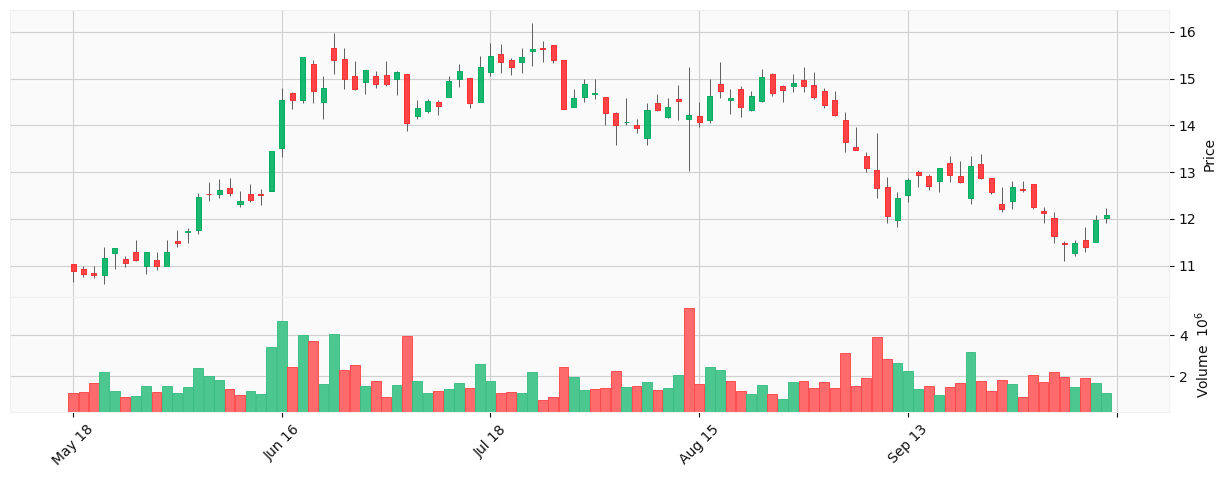

In [273]:
mpf.plot(data , type='candle' , volume=True , figratio=(14,5) , style='yahoo')

In [275]:
def getProfile(symbol):
    url = 'https://finnhub.io/api/v1/stock/profile2'
    p = {'token' : TOKEN_FH , 'symbol' : symbol }
    r = requests.get(url , params = p)
    js = r.json()
    df = pd.DataFrame(js , index=[symbol])
    return df
                      
data_ypf = getProfile('YPF')
data_ypf

,country,currency,estimateCurrency,exchange,finnhubIndustry,ipo,logo,marketCapitalization,name,phone,shareOutstanding,ticker,weburl
YPF,AR,ARS,ARS,BOLSA DE COMERCIO DE BUENOS AIRES,Energy,1999-04-14,https://static2.finnhub.io/file/publicdatany/f...,4037164.77,YPF SA,541154411276.0,393.26,YPFD3.BA,https://www.ypf.com/


In [276]:
def getSymbolNews(symbol , fromDate , toDate):
    url = 'https://finnhub.io/api/v1/company-news'
    p = {'token' : TOKEN_FH , 'symbol' : symbol , 'from' : fromDate , 'to' : toDate}
    r = requests.get(url , params = p)
    js = r.json()
    df = pd.DataFrame(js)
    return df
                      
data_info_ypf = getSymbolNews('YPF' , '2023-01-01' , '2023-10-10')
for id , row in data_info_ypf.iterrows():
    fecha = datetime.fromtimestamp(row.datetime)
    print(row.category , '--' , row.source , '--' , fecha , '\n' , row.headline , '\n' , row.url)
    if id==4:
        break

company -- Stock Options Channel -- 2023-10-05 06:54:00 
 YPF November 24th Options Begin Trading 
 https://finnhub.io/api/news?id=445844603b0d3b8e154b85bf102fec278864f025a79e644c8a880229dc6df170
company -- Yahoo -- 2023-10-04 19:15:16 
 YPF Sociedad Anonima (YPF) Stock Sinks As Market Gains: Here's Why 
 https://finnhub.io/api/news?id=8ff4cdf9ccd8968d889c50d25adfb15b42999273a476dca0927caa075b194904
company -- Energy Stock Channel -- 2023-10-03 00:23:00 
 YPF Stock Crowded With Sellers 
 https://finnhub.io/api/news?id=c5624906498d4ec1bc347d519b48443ff89705b11199e187658181e4b61b1228
company -- Energy Stock Channel -- 2023-10-02 06:53:00 
 YPF SA Breaks Below 200-Day Moving Average - Notable for YPF 
 https://finnhub.io/api/news?id=5844a8893283f03c4527c0061a435b743df943035dfc17d5d424a1f25f51e1ec
company -- Yahoo -- 2023-09-28 07:26:00 
 Vista Oil & Gas, S.A.B. de C.V. Sponsored ADR (VIST) Soars 10.1%: Is Further Upside Left in the Stock? 
 https://finnhub.io/api/news?id=3cc771c9d5b489131